In [42]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [43]:
tickers = [
    # Equity (S&P 500 Approx Top 10)
    'AAPL', 'MSFT', 'NVDA', 'AMZN', 'GOOGL', 'META', 'TSLA', 'BRK-B', 'JPM', 'V',
    # Fixed Income (US Treasury ETFs)
    'SHY', 'IEF', 'TLT',
    # Commodities
    'USO', 'GLD'
]

In [44]:
data = yf.download(tickers, start="2020-01-01", end="2025-01-01", auto_adjust=False)
returns = data.xs('Adj Close', axis=1, level=0).pct_change().dropna()
returns = returns[tickers]

[*********************100%***********************]  15 of 15 completed


In [45]:
# 2. 포트폴리오 가중치 설정 (가정)
# 주식 60%, 채권 30%, 원자재 10% 비중을 개별 종목 수로 n분
weights_dict = {}
n_equity = 10
n_bond = 3
n_comm = 2

for t in tickers:
    if t in ['AAPL', 'MSFT', 'NVDA', 'AMZN', 'GOOGL', 'META', 'TSLA', 'BRK-B', 'JPM', 'V']:
        weights_dict[t] = 0.60 / n_equity
    elif t in ['SHY', 'IEF', 'TLT']:
        weights_dict[t] = 0.30 / n_bond
    else:
        weights_dict[t] = 0.10 / n_comm

# 가중치 배열 생성 (데이터 컬럼 순서에 맞춰 정렬)
weights = np.array([weights_dict[col] for col in returns.columns])

In [46]:
weights

array([0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.1 ,
       0.1 , 0.1 , 0.05, 0.05])

In [47]:
# 3. Cholesky Decomposition (Covariance Matrix 기반)
# 공분산 행렬은 각 자산의 변동성(Vol)과 상관관계(Corr)를 모두 포함하고 있음
orig_cov = returns.cov()

In [48]:
orig_cov

Ticker,AAPL,MSFT,NVDA,AMZN,GOOGL,META,TSLA,BRK-B,JPM,V,SHY,IEF,TLT,USO,GLD
Ticker,,,,,,,,,,,,,,,
AAPL,3.982283e-04,2.868916e-04,4.107171e-04,2.677329e-04,0.000265,3.178418e-04,4.076556e-04,1.471426e-04,0.000168,2.048208e-04,6.553609e-07,-3.155365e-06,-1.993083e-05,0.000100,0.000025
MSFT,2.868916e-04,3.690796e-04,4.447873e-04,2.953091e-04,0.000293,3.367931e-04,3.630114e-04,1.410887e-04,0.000166,2.051766e-04,9.055998e-07,-3.483324e-06,-2.048504e-05,0.000095,0.000023
NVDA,4.107171e-04,4.447873e-04,1.151956e-03,4.457805e-04,0.000413,5.139465e-04,6.696539e-04,1.756894e-04,0.000226,2.831999e-04,4.096671e-07,-2.533762e-06,-1.266166e-05,0.000135,0.000043
AMZN,2.677329e-04,2.953091e-04,4.457805e-04,5.132561e-04,0.000300,3.902337e-04,4.147592e-04,1.091985e-04,0.000123,1.615329e-04,2.317034e-06,5.280118e-06,-1.151777e-07,0.000065,0.000032
GOOGL,2.651143e-04,2.934760e-04,4.128315e-04,3.001724e-04,0.000419,3.711560e-04,3.458479e-04,1.397881e-04,0.000169,1.965661e-04,1.230877e-06,-1.727966e-06,-1.648043e-05,0.000098,0.000026
META,3.178418e-04,3.367931e-04,5.139465e-04,3.902337e-04,0.000371,8.000062e-04,3.966564e-04,1.446942e-04,0.000175,2.166294e-04,7.326869e-07,-3.210606e-06,-1.753087e-05,0.000088,0.000026
TSLA,4.076556e-04,3.630114e-04,6.696539e-04,4.147592e-04,0.000346,3.966564e-04,1.791015e-03,1.597208e-04,0.000237,2.637232e-04,-3.661918e-07,2.620239e-07,-4.783498e-06,0.000153,0.000036
BRK-B,1.471426e-04,1.410887e-04,1.756894e-04,1.091985e-04,0.000140,1.446942e-04,1.597208e-04,1.875556e-04,0.000219,1.643501e-04,-9.129963e-07,-1.072080e-05,-3.345052e-05,0.000112,0.000007
JPM,1.678180e-04,1.658289e-04,2.260581e-04,1.234739e-04,0.000169,1.753387e-04,2.367630e-04,2.193761e-04,0.000420,2.219072e-04,-3.215365e-06,-2.388686e-05,-6.530203e-05,0.000160,-0.000003


In [49]:
try:
    # L * L.T = Covariance
    # L을 난수에 곱하면, 그 난수는 해당 공분산 구조(변동성+상관관계)를 갖게 됨
    L = np.linalg.cholesky(orig_cov.values)
    
# If the Covariance is non-positive definite. (Because of Multicollinearity)
except np.linalg.LinAlgError:
    print("Matrix regularization applied.")
    orig_cov += np.eye(len(orig_cov)) * 1e-6
    L = np.linalg.cholesky(orig_cov.values)

In [50]:
# 4. Monte Carlo Simulation (Percentage Basis)
n_sims = 10000
simulated_returns = []

np.random.seed(123)

for _ in range(n_sims):
    # (1) Uncorrelated Random Shocks (Standard Normal)
    Z = np.random.normal(0, 1, len(tickers))
    
    # (2) Correlated Shocks (Returns)
    # L을 곱하면 '표준편차'와 '상관관계'가 적용된 수익률 벡터가 나옴
    correlated_daily_returns = L @ Z
    
    # (3) Portfolio Return Calculation
    # 가중 평균 (Weight * Asset Return)
    port_ret = np.dot(weights, correlated_daily_returns)
    simulated_returns.append(port_ret)

simulated_returns = np.array(simulated_returns)

In [51]:
# 5. 결과 분석 (Percentiles)
# 하위 5% (95% VaR), 하위 1% (99% VaR)
var_95 = np.percentile(simulated_returns, 5)
var_99 = np.percentile(simulated_returns, 1)

In [52]:
# Expected Shortfall (CVaR) - Tail의 평균
cvar_99 = simulated_returns[simulated_returns <= var_99].mean()

print("\n========== STRESS TEST RESULTS (Daily %) ==========")
print(f"95% VaR: {var_95:.2%} (95% 확률로 이보다 덜 잃음)")
print(f"99% VaR: {var_99:.2%} (100일에 1번 꼴로 발생 가능한 손실)")
print(f"99% CVaR (Expected Shortfall): {cvar_99:.2%} (최악의 상황 시 평균 손실률)")



========== STRESS TEST RESULTS (Daily %) ==========
95% VaR: -1.80% (95% 확률로 이보다 덜 잃음)
99% VaR: -2.58% (100일에 1번 꼴로 발생 가능한 손실)
99% CVaR (Expected Shortfall): -2.96% (최악의 상황 시 평균 손실률)


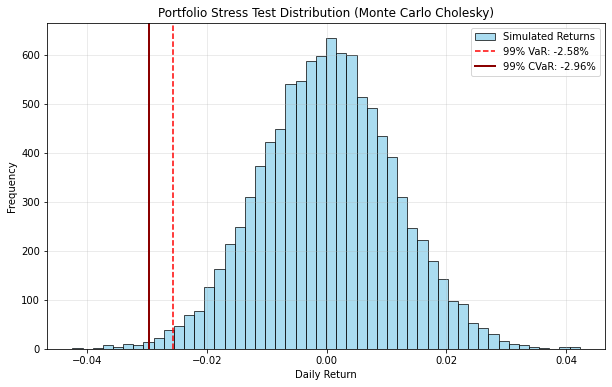

In [53]:
# 6. 시각화 (인터뷰 리포팅용)
plt.figure(figsize=(10, 6))
plt.hist(simulated_returns, bins=50, alpha=0.7, color='skyblue', edgecolor='black', label='Simulated Returns')
plt.axvline(var_99, color='r', linestyle='--', label=f'99% VaR: {var_99:.2%}')
plt.axvline(cvar_99, color='darkred', linestyle='-', linewidth=2, label=f'99% CVaR: {cvar_99:.2%}')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.title('Portfolio Stress Test Distribution (Monte Carlo Cholesky)')
plt.grid(True, alpha=0.3)
plt.show()

## Stress Test

In [54]:
# Recall the statistics
orig_cov = returns.cov()
orig_corr = returns.corr()
vols = returns.std()

In [55]:
orig_corr

Ticker,AAPL,MSFT,NVDA,AMZN,GOOGL,META,TSLA,BRK-B,JPM,V,SHY,IEF,TLT,USO,GLD
Ticker,,,,,,,,,,,,,,,
AAPL,1.000000,0.748328,0.606399,0.592200,0.648932,0.563117,0.482700,0.538403,0.410426,0.584309,0.027261,-0.031535,-0.088259,0.181055,0.129603
MSFT,0.748328,1.000000,0.682141,0.678500,0.746181,0.619807,0.446489,0.536250,0.421272,0.607998,0.039130,-0.036162,-0.094228,0.179733,0.124593
NVDA,0.606399,0.682141,1.000000,0.579744,0.594137,0.535369,0.466211,0.377974,0.325060,0.475017,0.010020,-0.014889,-0.032967,0.144722,0.128479
AMZN,0.592200,0.678500,0.579744,1.000000,0.647196,0.608991,0.432593,0.351953,0.265993,0.405909,0.084899,0.046483,-0.000449,0.104236,0.146091
GOOGL,0.648932,0.746181,0.594137,0.647196,1.000000,0.640976,0.399179,0.498583,0.402702,0.546606,0.049909,-0.016834,-0.071138,0.173138,0.128999
META,0.563117,0.619807,0.535369,0.608991,0.640976,1.000000,0.331374,0.373542,0.302547,0.436019,0.021503,-0.022639,-0.054772,0.113114,0.092567
TSLA,0.482700,0.446489,0.466211,0.432593,0.399179,0.331374,1.000000,0.275579,0.273040,0.354759,-0.007183,0.001235,-0.009988,0.131450,0.086518
BRK-B,0.538403,0.536250,0.377974,0.351953,0.498583,0.373542,0.275579,1.000000,0.781783,0.683186,-0.055340,-0.156127,-0.215844,0.297704,0.051165
JPM,0.410426,0.421272,0.325060,0.265993,0.402702,0.302547,0.273040,0.781783,1.000000,0.616549,-0.130265,-0.232507,-0.281637,0.284283,-0.015963


In [56]:
# ---------------------------------------------------------
# STRESS STEP 1: 상관관계 붕괴 (Correlation Breakdown)
# ---------------------------------------------------------
# 모든 자산 간의 상관관계를 0.9로 강제 설정 (분산효과 제거)
stressed_corr = orig_corr.copy()
for i in range(len(tickers)):
    for j in range(len(tickers)):
        if i != j:
            stressed_corr.iloc[i, j] = 0.9

In [57]:
stressed_corr

Ticker,AAPL,MSFT,NVDA,AMZN,GOOGL,META,TSLA,BRK-B,JPM,V,SHY,IEF,TLT,USO,GLD
Ticker,,,,,,,,,,,,,,,
AAPL,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
MSFT,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
NVDA,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
AMZN,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
GOOGL,0.9,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
META,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
TSLA,0.9,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
BRK-B,0.9,0.9,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,0.9
JPM,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9


In [58]:
# ---------------------------------------------------------
# STRESS STEP 2: 변동성 증폭 (Volatility Scaling)
# ---------------------------------------------------------
# 위기 상황에서는 변동성이 평소의 2배가 된다고 가정
stressed_vols = vols * 2

# 새로운 Stress Covariance Matrix 생성: Cov = Vol * Corr * Vol
stressed_cov = np.outer(stressed_vols, stressed_vols) * stressed_corr.values

In [59]:
# ---------------------------------------------------------
# STRESS STEP 3: Cholesky & Simulation
# ---------------------------------------------------------
# 수치적 안정성을 위해 미세값(epsilon) 추가 후 분해
# Why? to avoid singularity of the cov.
L_stress = np.linalg.cholesky(stressed_cov + np.eye(len(tickers)) * 1e-8)


In [60]:
n_sims = 10000
stress_results = []

np.random.seed(123)
for _ in range(n_sims):
    Z = np.random.normal(0, 1, len(tickers))
    
    # EWMA 변동성과 붕괴된 상관관계가 적용된 수익률
    correlated_returns = L_stress @ Z
    
    # STRESS STEP 4: 특정 섹터에 Deterministic Shock 주입
    # 주식 섹터(0~9번)에 -10% 추가 강제 하락
    correlated_returns[0:10] -= 0.10 
    
    port_ret = np.dot(weights, correlated_returns)
    stress_results.append(port_ret)

stress_results = np.array(stress_results)

# 결과 분석
stress_var_99 = np.percentile(stress_results, 1)
baseline_returns = np.dot(returns, weights)
print(f"Normal 99% VaR (Historical): {np.percentile(baseline_returns, 1):.2%}")
print(f"STRESSED 99% VaR: {stress_var_99:.2%}")

Normal 99% VaR (Historical): -3.18%
STRESSED 99% VaR: -14.14%


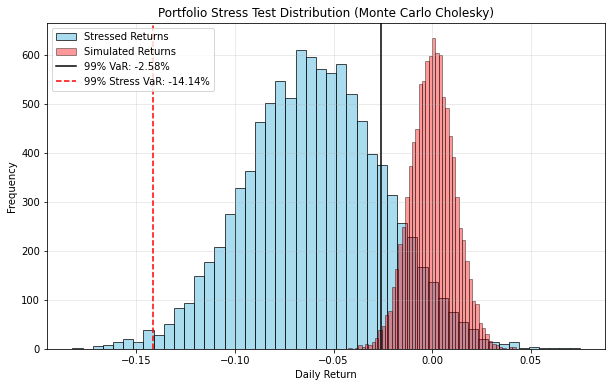

In [61]:
# 6. 시각화 (인터뷰 리포팅용)
plt.figure(figsize=(10, 6))
plt.hist(stress_results, bins=50, alpha=0.7, color='skyblue', edgecolor='black', label='Stressed Returns')
plt.hist(simulated_returns, bins=50, alpha=0.4, color='red', edgecolor='black', label='Simulated Returns')
plt.axvline(var_99, color='black', linestyle='-', label=f'99% VaR: {var_99:.2%}')
plt.axvline(stress_var_99, color='r', linestyle='--', label=f'99% Stress VaR: {stress_var_99:.2%}')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.title('Portfolio Stress Test Distribution (Monte Carlo Cholesky)')
plt.grid(True, alpha=0.3)
plt.show()

## Stress Test under EWMA variance

In [62]:
def calculate_EWMA_cov(returns,lam = 0.94, burn_in=30):
    initial_data = returns.iloc[:burn_in]
    current_cov = initial_data.cov().values

    for t in range(burn_in, len(returns)):
        prev_ret = returns.iloc[t-1].values.reshape(-1, 1)
        
        current_cov = lam * current_cov + (1 - lam) * (prev_ret @ prev_ret.T)
    
    return current_cov    

In [63]:
# Recent EWMA cov
orig_cov_EWMA = calculate_EWMA_cov(returns)
orig_corr = returns.corr()


In [64]:
# ---------------------------------------------------------
# STRESS STEP 1: 상관관계 붕괴 (Correlation Breakdown)
# ---------------------------------------------------------
# EWMA Cov에서 Vol과 Corr 분리
vols = np.sqrt(np.diag(orig_cov_EWMA))
# Correlation Matrix = D^-1 * Cov * D^-1
D_inv = np.diag(1/vols)
latest_corr = D_inv @ orig_cov_EWMA @ D_inv

# 모든 자산 간 상관관계를 0.9로 상향 (분산효과 제거)
# Crisis일때 모든 자산이 함께 박살나는 경우가 많으니까. 
stressed_corr = np.full(latest_corr.shape, 0.9)
np.fill_diagonal(stressed_corr, 1.0)

In [65]:
# ---------------------------------------------------------
# STRESS STEP 2: 변동성 증폭 (Volatility Scaling)
# ---------------------------------------------------------
# EWMA로 구한 최신 변동성을 2배로 증폭 (Stress Scaling)
stressed_vols = vols * 2.0

# 새로운 Stress Covariance Matrix 재조합: Cov = Vol * Corr * Vol
# np.outer(v, v) * corr 방식으로 행렬 연산
stressed_cov = np.outer(stressed_vols, stressed_vols) * stressed_corr

In [66]:
# ---------------------------------------------------------
# STRESS STEP 3: Cholesky & Simulation
# ---------------------------------------------------------
# 수치적 안정성을 위해 미세값(epsilon) 추가 후 분해
# Why? to avoid singularity of the cov.
L_stress = np.linalg.cholesky(stressed_cov + np.eye(len(tickers)) * 1e-8)


In [67]:
n_sims = 10000
stress_results = []

np.random.seed(123)
for _ in range(n_sims):
    Z = np.random.normal(0, 1, len(tickers))
    
    # EWMA 변동성과 붕괴된 상관관계가 적용된 수익률
    correlated_returns = L_stress @ Z
    
    # STRESS STEP 4: 특정 섹터에 Deterministic Shock 주입
    # 주식 섹터(0~9번)에 -10% 추가 강제 하락
    correlated_returns[0:10] -= 0.10 
    
    port_ret = np.dot(weights, correlated_returns)
    stress_results.append(port_ret)

stress_results = np.array(stress_results)

# 결과 분석
stress_var_99 = np.percentile(stress_results, 1)
baseline_returns = np.dot(returns, weights)
print(f"Normal 99% VaR (Historical): {np.percentile(baseline_returns, 1):.2%}")
print(f"STRESSED 99% VaR: {stress_var_99:.2%}")

Normal 99% VaR (Historical): -3.18%
STRESSED 99% VaR: -12.06%


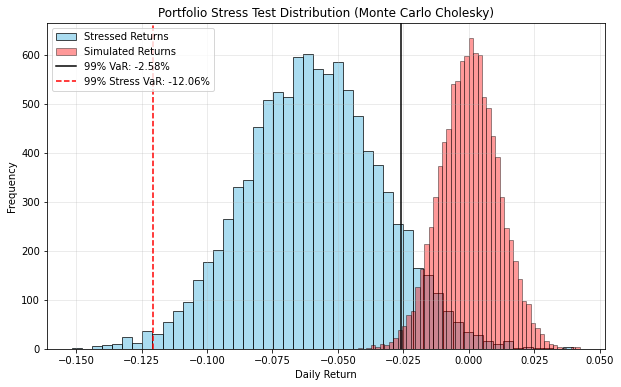

In [68]:
# 6. 시각화 (인터뷰 리포팅용)
plt.figure(figsize=(10, 6))
plt.hist(stress_results, bins=50, alpha=0.7, color='skyblue', edgecolor='black', label='Stressed Returns')
plt.hist(simulated_returns, bins=50, alpha=0.4, color='red', edgecolor='black', label='Simulated Returns')
plt.axvline(var_99, color='black', linestyle='-', label=f'99% VaR: {var_99:.2%}')
plt.axvline(stress_var_99, color='r', linestyle='--', label=f'99% Stress VaR: {stress_var_99:.2%}')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.title('Portfolio Stress Test Distribution (Monte Carlo Cholesky)')
plt.grid(True, alpha=0.3)
plt.show()